#Importing Dependencies

In [ ]:
!pip install -U transformers tensorflow tf-keras tensorflow_addons contractions emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
import gdown
import contractions
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import gc
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_recall_fscore_support, roc_curve, auc
from transformers import AdamWeightDecay, TFBertModel, BertConfig, BertTokenizer ,InputExample, InputFeatures ,TFBertForSequenceClassification
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau ,ModelCheckpoint
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.metrics import Precision, Recall
from google.colab import files
import warnings
import time
import os
from datetime import datetime
from tensorflow.keras.layers import (Input, LSTM, Dense, Dropout, Bidirectional, Attention,
                                     GlobalAveragePooling1D, Embedding ,BatchNormalization ,SpatialDropout1D,
                                     Reshape, Activation, GlobalMaxPooling1D, Concatenate)

In [ ]:
# Ensure punkt is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.19.0


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"heshamalsaadi","key":"3668e4ef1bf41df07b27db2cec059f92"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Loading Datasets

##Sentiment140 dataset with 1.6 million tweets

In [ ]:
# Replace 'your_shareable_link' with the actual shareable link
file_url = 'https://drive.google.com//uc?export=download&id=1qII5FQCBQ88YD17jTzqr6g_uOPzEqapA'
output = 'training.1600000.processed.noemoticon.csv'
gdown.download(file_url, output, quiet=False)

Downloading...
From (original): https://drive.google.com//uc?export=download&id=1qII5FQCBQ88YD17jTzqr6g_uOPzEqapA
From (redirected): https://drive.google.com/uc?export=download&id=1qII5FQCBQ88YD17jTzqr6g_uOPzEqapA&confirm=t&uuid=c6769e6d-c800-477a-9657-524d046f36c7
To: /content/training.1600000.processed.noemoticon.csv
100%|██████████| 239M/239M [00:01<00:00, 181MB/s]


'training.1600000.processed.noemoticon.csv'

In [ ]:
file_path = '/content/training.1600000.processed.noemoticon.csv'
DATASET_COLUMNS = ["sentiment", "ids", "date", "flag", "user", "text"]

In [ ]:
# Load the CSV file into a DataFrame
df_Sentiment140_dataset = pd.read_csv(file_path, encoding='ISO-8859-1', names=DATASET_COLUMNS)
df_Sentiment140_dataset = df_Sentiment140_dataset.drop(['ids', 'date', 'flag', 'user'], axis=1)

In [ ]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df_Sentiment140_dataset.sentiment = df_Sentiment140_dataset.sentiment.apply(lambda x: label_decoder(x))
df_Sentiment140_dataset = df_Sentiment140_dataset[['text', 'sentiment']]
df_Sentiment140_dataset

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,is upset that he can't update his Facebook by ...,Negative
2,@Kenichan I dived many times for the ball. Man...,Negative
3,my whole body feels itchy and like its on fire,Negative
4,"@nationwideclass no, it's not behaving at all....",Negative
...,...,...
1599995,Just woke up. Having no school is the best fee...,Positive
1599996,TheWDB.com - Very cool to hear old Walt interv...,Positive
1599997,Are you ready for your MoJo Makeover? Ask me f...,Positive
1599998,Happy 38th Birthday to my boo of alll time!!! ...,Positive


##IMDB Vision and NLP

In [ ]:
!kaggle datasets download -d raynardj/imdb-vision-and-nlp

Dataset URL: https://www.kaggle.com/datasets/raynardj/imdb-vision-and-nlp
License(s): GPL-2.0
 97% 409M/420M [00:01<00:00, 393MB/s]
100% 420M/420M [00:01<00:00, 373MB/s]


In [ ]:
!unzip imdb-vision-and-nlp.zip

Archive:  imdb-vision-and-nlp.zip
  inflating: __notebook_source__.ipynb  
  inflating: images/images/100029_.jpg  
  inflating: images/images/1000774_.jpg  
  inflating: images/images/100114_.jpg  
  inflating: images/images/1001508_.jpg  
  inflating: images/images/100150_.jpg  
  inflating: images/images/1001526_.jpg  
  inflating: images/images/100157_.jpg  
  inflating: images/images/100258_.jpg  
  inflating: images/images/100260_.jpg  
  inflating: images/images/100318_.jpg  
  inflating: images/images/100403_.jpg  
  inflating: images/images/100404_.jpg  
  inflating: images/images/100405_.jpg  
  inflating: images/images/100502_.jpg  
  inflating: images/images/100507_.jpg  
  inflating: images/images/1007028_.jpg  
  inflating: images/images/1007029_.jpg  
  inflating: images/images/100758_.jpg  
  inflating: images/images/100802_.jpg  
  inflating: images/images/100814_.jpg  
  inflating: images/images/100935_.jpg  
  inflating: images/images/100944_.jpg  
  inflating: image

In [ ]:
file_path = '/content/reviews.csv'
df_IMDB = pd.read_csv(file_path)
df_IMDB

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw1133942,OriginalMovieBuff21,Kill Bill: Vol. 2 (2004),8.0,Good follow up that answers all the questions,24 July 2005,0,"After seeing Tarantino's Kill Bill Vol: 1, I g...","['0', '1']"
1,rw1133959,lost-in-limbo,Feardotcom (2002),3.0,"""I couldn't make much sense of it myself"". Too...",24 July 2005,0,There's a Website called FearDotCom and anyone...,"['1', '4']"
2,rw1133985,NateManD,Persona (1966),10.0,Persona gives me all the reasons to love art-h...,24 July 2005,0,"Long before ""Muholland Drive"" there was anothe...","['9', '23']"
3,rw1133999,CAMACHO-4,War of the Worlds (2005),3.0,A disappointing film from the team that you Mi...,24 July 2005,0,Spielberg said this film is based on the H.G. ...,"['9', '14']"
4,rw1134010,CAMACHO-4,Mr. & Mrs. Smith (2005),6.0,A fun action movie with great chemistry,24 July 2005,0,"Director Doug Liman, who's gotten famous for m...","['1', '3']"
...,...,...,...,...,...,...,...,...,...
542456,rw1012552,JamesHitchcock,Stepmom (1998),5.0,What Would Scriptwriters Do Without Terminal I...,2 February 2005,1,Stepmom gets off to quite a promising start. L...,"['6', '12']"
542457,rw1012555,zardoz-13,Coach Carter (2005),8.0,"""Coach Carter"" makes the grade!!!",2 February 2005,1,Every conscientious high school educator ought...,"['0', '1']"
542458,rw1012557,zardoz-13,Alone in the Dark (2005),5.0,"""Alone in the Dark"" is a moan of a lark",2 February 2005,1,You know when a movie is in trouble when its f...,"['2', '7']"
542459,rw1012561,philip_vanderveken,Garfield (2004),4.0,This has nothing to do with the cartoon cat th...,2 February 2005,0,I've known the Garfield comic all my life (Gar...,"['2', '5']"


In [ ]:
# Filter rows where rating is between 4 and 7
df_IMDB_filtered = df_IMDB[(df_IMDB['rating'] >= 4) & (df_IMDB['rating'] <= 7)]
df_IMDB_filtered['sentiment'] = 'neutral'

<ipython-input-57-2888082710>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMDB_filtered['sentiment'] = 'neutral'


In [ ]:
# Check the unique values in the 'rating' column
print(df_IMDB_filtered['rating'].unique())

# Check the shape of the filtered DataFrame
print(df_IMDB_filtered.shape)
df_IMDB_filtered

[6. 7. 4. 5.]
(203945, 10)


,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,sentiment
4,rw1134010,CAMACHO-4,Mr. & Mrs. Smith (2005),6.0,A fun action movie with great chemistry,24 July 2005,0,"Director Doug Liman, who's gotten famous for m...","['1', '3']",neutral
5,rw1134035,cshep,Christine (1983),7.0,Bullied Student Gets REVENGE !!!,24 July 2005,1,Joh Carpenter directs this early 80's Stephen ...,"['1', '1']",neutral
12,rw1134121,sol-,The Upside of Anger (2005),4.0,My brief review of the film,24 July 2005,0,Aggression is something that many of us have n...,"['1', '2']",neutral
14,rw1134149,sol-,Anything Else (2003),7.0,My brief review of the film,24 July 2005,0,This may not be as funny or as deep as some of...,"['5', '9']",neutral
16,rw1134153,ma-cortes,The Alamo (2004),7.0,Interesting rendition of the mythic Alamo miss...,24 July 2005,0,Epic western upon the state of Texas's fight f...,"['20', '21']",neutral
...,...,...,...,...,...,...,...,...,...,...
542454,rw1012547,Bob-45,Shenandoah (1965),7.0,Weakened By Production Values and Coincidence,2 February 2005,0,Charley Anderson (James Stewart) is the widowe...,"['8', '17']",neutral
542455,rw1012551,mjw2305,Sphere (1998),5.0,Cheat!,2 February 2005,1,"With a good cast, a writer with a pedigree and...","['2', '5']",neutral
542456,rw1012552,JamesHitchcock,Stepmom (1998),5.0,What Would Scriptwriters Do Without Terminal I...,2 February 2005,1,Stepmom gets off to quite a promising start. L...,"['6', '12']",neutral
542458,rw1012557,zardoz-13,Alone in the Dark (2005),5.0,"""Alone in the Dark"" is a moan of a lark",2 February 2005,1,You know when a movie is in trouble when its f...,"['2', '7']",neutral


In [ ]:
df_IMDB_filtered = df_IMDB_filtered.drop(['review_id', 'reviewer', 'movie', 'review_date','spoiler_tag','helpful', 'review_summary', 'rating'], axis=1)
df_IMDB_filtered.rename(columns={'review_detail': 'text'}, inplace=True)
df_IMDB_filtered

,text,sentiment
4,"Director Doug Liman, who's gotten famous for m...",neutral
5,Joh Carpenter directs this early 80's Stephen ...,neutral
12,Aggression is something that many of us have n...,neutral
14,This may not be as funny or as deep as some of...,neutral
16,Epic western upon the state of Texas's fight f...,neutral
...,...,...
542454,Charley Anderson (James Stewart) is the widowe...,neutral
542455,"With a good cast, a writer with a pedigree and...",neutral
542456,Stepmom gets off to quite a promising start. L...,neutral
542458,You know when a movie is in trouble when its f...,neutral


###Deleting Unwated Files and Folders

In [ ]:
import os

# List all files and folders in the current directory
for root, dirs, files in os.walk('.'):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

./reviews.csv
./twitter_validation.csv
./imdb-vision-and-nlp.zip
./movies.csv
./twitter_training.csv
./Reddit_Data.csv
./Twitter_Data.csv
./kaggle.json
./training.1600000.processed.noemoticon.csv
./text.csv
./__notebook_source__.ipynb
./.config
./images
./sample_data
./.config/.last_update_check.json
./.config/.last_opt_in_prompt.yaml
./.config/config_sentinel
./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./.config/.last_survey_prompt.yaml
./.config/active_config
./.config/gce
./.config/default_configs.db
./.config/logs
./.config/configurations
./.config/logs/2025.06.11
./.config/logs/2025.06.11/13.37.27.755669.log
./.config/logs/2025.06.11/13.37.18.763091.log
./.config/logs/2025.06.11/13.37.08.919149.log
./.config/logs/2025.06.11/13.37.27.125319.log
./.config/logs/2025.06.11/13.36.48.453813.log
./.config/logs/2025.06.11/13.37.17.609931.log
./.config/configurations/config_default
./images/images
./images/images/107254_.jpg
./images/images/2726560_.jpg
./image

In [ ]:
# List of files to delete
files_to_delete = ['__notebook_source__.ipynb', 'movies.csv', 'imdb-vision-and-nlp.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: __notebook_source__.ipynb
Deleted: movies.csv
Deleted: imdb-vision-and-nlp.zip


In [ ]:
import shutil

# List of folders to delete
folders_to_delete = ['images']

for folder in folders_to_delete:
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted: {folder}")
    else:
        print(f"Folder not found: {folder}")

Deleted: images


##Twitter Sentiment Dataset

In [ ]:
!kaggle datasets download -d saurabhshahane/twitter-sentiment-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/7.60M [00:00<?, ?B/s]
100% 7.60M/7.60M [00:00<00:00, 1.07GB/s]


In [ ]:
!unzip twitter-sentiment-dataset.zip

Archive:  twitter-sentiment-dataset.zip
replace Twitter_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Twitter_Data.csv        


In [ ]:
# List of files to delete
files_to_delete = ['twitter-sentiment-dataset.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-sentiment-dataset.zip


In [ ]:
file_path = '/content/Twitter_Data.csv'
df_Twitter_Data = pd.read_csv(file_path)
df_Twitter_Data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df_Twitter_Data_filtered = df_Twitter_Data[(df_Twitter_Data['category'] == 0)]
df_Twitter_Data_filtered['sentiment'] = 'neutral'
df_Twitter_Data_filtered = df_Twitter_Data_filtered.drop(['category'], axis=1)
df_Twitter_Data_filtered.rename(columns={'clean_text': 'text'}, inplace=True)
df_Twitter_Data_filtered

<ipython-input-67-1999921899>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Twitter_Data_filtered['sentiment'] = 'neutral'


,text,sentiment
1,talk all the nonsense and continue all the dra...,neutral
5,kiya tho refresh maarkefir comment karo,neutral
6,surat women perform yagna seeks divine grace f...,neutral
7,this comes from cabinet which has scholars lik...,neutral
13,one vote can make all the difference anil kapo...,neutral
...,...,...
162968,case dont look candidate then that case person...,neutral
162971,congress veteran sudhakar reddy joins bjp afte...,neutral
162974,save your agenda peddling ’ had with terror at...,neutral
162977,did you cover her interaction forum where she ...,neutral


##Reddit Sentimental analysis Dataset

In [ ]:
!kaggle datasets download -d cosmos98/twitter-and-reddit-sentimental-analysis-dataset

Dataset URL: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/10.0M [00:00<?, ?B/s]
100% 10.0M/10.0M [00:00<00:00, 1.09GB/s]


In [ ]:
!unzip twitter-and-reddit-sentimental-analysis-dataset.zip
#Answer (n)

Archive:  twitter-and-reddit-sentimental-analysis-dataset.zip
replace Reddit_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Reddit_Data.csv         
  inflating: Twitter_Data.csv        


In [ ]:
# List of files to delete
files_to_delete = ['twitter-and-reddit-sentimental-analysis-dataset.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-and-reddit-sentimental-analysis-dataset.zip


In [ ]:
file_path = '/content/Reddit_Data.csv'
df_Reddit_Data = pd.read_csv(file_path)
df_Reddit_Data

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
df_Reddit_Data_filtered = df_Reddit_Data[(df_Reddit_Data['category'] == 0)]
df_Reddit_Data_filtered['sentiment'] = 'neutral'
df_Reddit_Data_filtered = df_Reddit_Data_filtered.drop(['category'], axis=1)
df_Reddit_Data_filtered.rename(columns={'clean_comment': 'text'}, inplace=True)
df_Reddit_Data_filtered

<ipython-input-72-3575280667>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Reddit_Data_filtered['sentiment'] = 'neutral'


,text,sentiment
3,what you have learned yours and only yours wha...,neutral
7,jesus was zen meets jew,neutral
18,zarus,neutral
19,blood and souls for lord arioch,neutral
25,his name shall lump wherever lumps are there w...,neutral
...,...,...
37241,let the janta decide not ulema clerics,neutral
37242,hona hai same with vaccination education insu...,neutral
37244,jesus,neutral
37246,downvote karna tha par upvote hogaya,neutral


##Emotions Dataset

In [ ]:
!kaggle datasets download -d nelgiriyewithana/emotions

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
License(s): other
  0% 0.00/15.7M [00:00<?, ?B/s]
100% 15.7M/15.7M [00:00<00:00, 1.15GB/s]


In [ ]:
!unzip emotions.zip

Archive:  emotions.zip
replace text.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: text.csv                


In [ ]:
# List of files to delete
files_to_delete = ['emotions.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: emotions.zip


In [ ]:
file_path = '/content/text.csv'
df_emotions = pd.read_csv(file_path)
df_emotions

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [ ]:
df_emotions_filtered = df_emotions[(df_emotions['label'] >= 1) & (df_emotions['label'] <= 4)]
df_emotions_filtered['sentiment'] = 'neutral'
df_emotions_filtered = df_emotions_filtered.drop(['label', 'Unnamed: 0'], axis=1)
df_emotions_filtered

<ipython-input-77-682634073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emotions_filtered['sentiment'] = 'neutral'


,text,sentiment
0,i just feel really helpless and heavy hearted,neutral
2,i gave up my internship with the dmrg and am f...,neutral
4,i am a kindergarten teacher and i am thoroughl...,neutral
6,i would think that whomever would be lucky eno...,neutral
7,i fear that they won t ever feel that deliciou...,neutral
...,...,...
416802,i feel like i have been neglecting you my fait...,neutral
416803,i cry and feel a sense of loss when my patient...,neutral
416804,i feel like telling these horny devils to find...,neutral
416805,i began to realize that when i was feeling agi...,neutral


##Twitter Sentiment Analysis Dataset

In [ ]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 689MB/s]


In [ ]:
!unzip twitter-entity-sentiment-analysis.zip

Archive:  twitter-entity-sentiment-analysis.zip
replace twitter_training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [ ]:
# List of files to delete
files_to_delete = ['twitter-entity-sentiment-analysis.zip']

for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"Deleted: {file}")
    else:
        print(f"File not found: {file}")

Deleted: twitter-entity-sentiment-analysis.zip


In [ ]:
file_path = '/content/twitter_training.csv'
df_twitter_training = pd.read_csv(file_path)
print(df_twitter_training.columns)
df_twitter_training

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
file_path = '/content/twitter_validation.csv'
df_twitter_validation = pd.read_csv(file_path)
print(df_twitter_validation.columns)
df_twitter_validation

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Remove column names (reset to default numeric index)
df_twitter_training.columns = range(df_twitter_training.shape[1])  # Reset column names to 0, 1, 2, ...
df_twitter_validation.columns = range(df_twitter_validation.shape[1])  # Reset column names to 0, 1, 2, ...

In [ ]:
# Combine the DataFrames
combined_df = pd.concat([df_twitter_training, df_twitter_validation], ignore_index=True)

# Add meaningful column names
combined_df.columns = ['id', 'ni', 'rate', 'text']

print("Combined DataFrame with meaningful column names:")
combined_df

Combined DataFrame with meaningful column names:


,id,ni,rate,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
75675,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75678,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df_combined_twitter_filtered = combined_df[(combined_df['rate'] == 'Neutral')]
df_combined_twitter_filtered['sentiment'] = 'neutral'
df_combined_twitter_filtered = df_combined_twitter_filtered.drop(['rate', 'ni', 'id'], axis=1)
df_combined_twitter_filtered

<ipython-input-85-2603707068>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_twitter_filtered['sentiment'] = 'neutral'


,text,sentiment
11,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
12,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
13,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
14,"Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...",neutral
15,"Live Rock - Hard music La la Varlope, RARE & t...",neutral
...,...,...
75657,This is....odd. @Google suggests the most dead...,neutral
75665,@6th__man playing red dead redemption-\n\n“Oh ...,neutral
75668,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,neutral
75671,Late night stream with the boys! Come watch so...,neutral


In [ ]:
df_combined_twitter_filtered

,text,sentiment
11,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
12,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
13,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",neutral
14,"Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...",neutral
15,"Live Rock - Hard music La la Varlope, RARE & t...",neutral
...,...,...
75657,This is....odd. @Google suggests the most dead...,neutral
75665,@6th__man playing red dead redemption-\n\n“Oh ...,neutral
75668,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,neutral
75671,Late night stream with the boys! Come watch so...,neutral


------------------------------------------------------------------------------------

#Dataset Preprocessing

In [ ]:
'''
df_combined_twitter_filtered
df_emotions_filtered x
df_Reddit_Data_filtered
df_Twitter_Data_filtered
df_IMDB_filtered x
df_Sentiment140_dataset
'''
all_data_df = pd.concat([df_combined_twitter_filtered, df_emotions_filtered, df_Reddit_Data_filtered, df_Twitter_Data_filtered,
                         df_IMDB_filtered, df_Sentiment140_dataset], ignore_index=True)
all_data_df_shuffled = all_data_df.sample(frac=1, random_state=42).reset_index(drop=True)
all_data_df_shuffled

,text,sentiment
0,@penstone because you have to relate it to foo...,Negative
1,Ughhhhhh! Stupid twitter. it wont let me uploa...,Negative
2,I'm going to be pissed if they cancel it... h...,Negative
3,Trired! Miss U!,Negative
4,"A Nightmare on Elm Street 4: The Dream Master,...",neutral
...,...,...
2171548,@ddlovato cool i saw pics of you on oceanmup....,Positive
2171549,Our trumpets totally pwn the lame violins,Positive
2171550,Baby was not herself after recieving vaccines,Negative
2171551,i feel that we have a loving relationship,neutral


In [ ]:
all_data_df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171553 entries, 0 to 2171552
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   text       object
 1   sentiment  object
dtypes: object(2)
memory usage: 33.1+ MB


In [ ]:
# Check current class distribution
original_distribution = all_data_df_shuffled['sentiment'].value_counts(normalize=True)
print("Original Class Distribution:")
print(original_distribution)

Original Class Distribution:
sentiment
Negative    0.3684
Positive    0.3684
neutral     0.2632
Name: proportion, dtype: float64


In [ ]:
TARGET_SAMPLE_SIZE = 100_000
SAMPLES_PER_CLASS = TARGET_SAMPLE_SIZE // 3  # 100,000 per class

# Get unique sentiment classes
sentiment_classes = all_data_df_shuffled['sentiment'].unique()

# Check if we have enough samples in each class
for cls in sentiment_classes:
    class_count = len(all_data_df_shuffled[all_data_df_shuffled['sentiment'] == cls])
    if class_count < SAMPLES_PER_CLASS:
        raise ValueError(f"Class {cls} only has {class_count} samples, need at least {SAMPLES_PER_CLASS}")

# Create balanced sample
all_data_df_shuffled = pd.concat([
    all_data_df_shuffled[all_data_df_shuffled['sentiment'] == cls]
    .sample(n=SAMPLES_PER_CLASS, random_state=42)
    for cls in sentiment_classes
])

# Final shuffle
all_data_df_shuffled = all_data_df_shuffled.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify distribution
print("Final class distribution:")
print(all_data_df_shuffled['sentiment'].value_counts(normalize=True))
print("\nAbsolute counts:")
print(all_data_df_shuffled['sentiment'].value_counts())

Final class distribution:
sentiment
Negative    0.333333
Positive    0.333333
neutral     0.333333
Name: proportion, dtype: float64

Absolute counts:
sentiment
Negative    33333
Positive    33333
neutral     33333
Name: count, dtype: int64


In [ ]:
# Check for null values in the 'text' column
null_count = all_data_df_shuffled['text'].isnull().sum()
print(f"Number of null values in 'text' column: {null_count}")

Number of null values in 'text' column: 0


In [ ]:
# Drop rows with null values in the 'text' column
all_data_df_shuffled = all_data_df_shuffled.dropna(subset=['text'])

# Verify that null values are removed
print(f"Number of null values after dropping: {all_data_df_shuffled['text'].isnull().sum()}")

Number of null values after dropping: 0


In [ ]:
# Check for null values in the 'text' column
null_count = all_data_df_shuffled['sentiment'].isnull().sum()
print(f"Number of null values in 'text' column: {null_count}")

Number of null values in 'text' column: 0


In [ ]:
# Drop rows with null values in the 'text' column
all_data_df_shuffled = all_data_df_shuffled.dropna(subset=['sentiment'])

# Verify that null values are removed
print(f"Number of null values after dropping: {all_data_df_shuffled['sentiment'].isnull().sum()}")

Number of null values after dropping: 0


Text(0.5, 1.0, 'target Data Distribution')

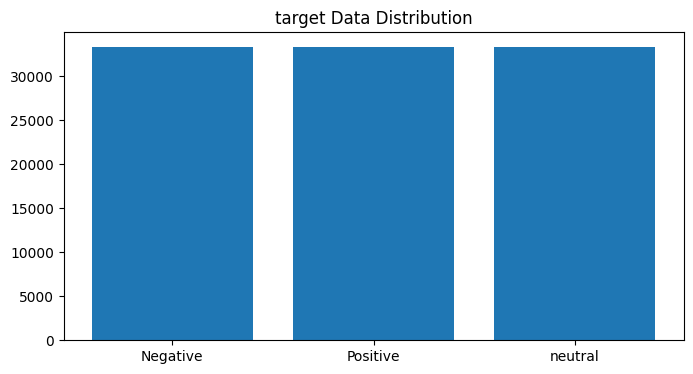

In [ ]:
val_count = all_data_df_shuffled.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("target Data Distribution")

In [ ]:
# Create a mapping dictionary
sentiment_mapping = {
    'Negative': -1,
    'neutral': 0,
    'Positive': 1
}

In [ ]:
all_data_df_shuffled['sentiment_numeric'] = all_data_df_shuffled['sentiment'].map(sentiment_mapping)

In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
# 1. Split Data
train_df, temp_df = train_test_split(all_data_df_shuffled, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.333, random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 69999
Validation set size: 20010
Testing set size: 9990


In [ ]:
# Create a mapping dictionary
sentiment_mapping = {
    'Negative': -1,
    'neutral': 0,
    'Positive': 1
}

In [ ]:
# Apply the mapping to your DataFrames
train_df['sentiment_numeric'] = train_df['sentiment'].map(sentiment_mapping)
val_df['sentiment_numeric'] = val_df['sentiment'].map(sentiment_mapping)
test_df['sentiment_numeric'] = test_df['sentiment'].map(sentiment_mapping)

#Model Training

In [ ]:
# Extract labels
y_train = train_df['sentiment_numeric'].values
# Extract labels
y_val = val_df['sentiment_numeric'].values

##Bert Only

In [ ]:
train_df['sentiment_numeric'] = train_df['sentiment_numeric'].astype(int)
val_df['sentiment_numeric'] = val_df['sentiment_numeric'].astype(int)

<ipython-input-60-540ded1a7aa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['sentiment_numeric'] = train_df['sentiment_numeric'].astype(int)
<ipython-input-60-540ded1a7aa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['sentiment_numeric'] = val_df['sentiment_numeric'].astype(int)


In [ ]:
# ----------------------------------------
# 1. Inspect Label Distribution
# ----------------------------------------
print("Original sentiment distribution:")
print(train_df['sentiment_numeric'].value_counts())

sentiment_numeric
-1    23369
 0    23361
 1    23269
Name: count, dtype: int64


In [ ]:
# ----------------------------------------
# 2. Load Pretrained BERT Tokenizer & Model
# ----------------------------------------
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# ----------------------------------------
# 3. Map Sentiment Labels: [-1, 0, 1] → [0, 1, 2]
# ----------------------------------------
label_map = {-1: 0, 0: 1, 1: 2}
train_df['sentiment_numeric'] = train_df['sentiment_numeric'].map(label_map).astype(int)
val_df['sentiment_numeric'] = val_df['sentiment_numeric'].map(label_map).astype(int)

# Confirm label mapping
print("\nMapped sentiment distribution:")
print("Train:", train_df['sentiment_numeric'].value_counts().to_dict())
print("Val:", val_df['sentiment_numeric'].value_counts().to_dict())

# ----------------------------------------
# 4. Tokenize Train & Validation Texts
# ----------------------------------------
train_encodings = tokenizer(
    train_df['text'].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='tf'
)

val_encodings = tokenizer(
    val_df['text'].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='tf'
)

# ----------------------------------------
# 5. Prepare TensorFlow Datasets
# ----------------------------------------
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_df['sentiment_numeric'].values
)).shuffle(1000).batch(16)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_df['sentiment_numeric'].values
)).batch(16)

# ----------------------------------------
# 6. Compile Model with AdamW Optimizer
# ----------------------------------------
optimizer = AdamWeightDecay(learning_rate=3e-5, weight_decay_rate=0.01)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# ----------------------------------------
# 7. Train Model
# ----------------------------------------
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train label distribution:
 sentiment_numeric
0    23369
1    23361
2    23269
Name: count, dtype: int64
Val label distribution:
 sentiment_numeric
2    6720
1    6693
0    6597
Name: count, dtype: int64
Epoch 1/3
4375/4375 [==============================] - 2285s 516ms/step - loss: 0.3291 - accuracy: 0.8605 - val_loss: 0.2700 - val_accuracy: 0.8854
Epoch 2/3
4375/4375 [==============================] - 2220s 507ms/step - loss: 0.2079 - accuracy: 0.9176 - val_loss: 0.3101 - val_accuracy: 0.8807
Epoch 3/3
4375/4375 [==============================] - 2215s 506ms/step - loss: 0.1196 - accuracy: 0.9564 - val_loss: 0.4192 - val_accuracy: 0.8754


In [ ]:
# ----------------------------------------
# 8. Preprocess Test Data
# ----------------------------------------
test_df['sentiment_numeric'] = test_df['sentiment_numeric'].map(label_map).astype(int)

test_encodings = tokenizer(
    test_df['text'].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='tf'
)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_df['sentiment_numeric'].values
)).batch(16)

# ----------------------------------------
# 9. Make Predictions
# ----------------------------------------
predictions = model.predict(test_dataset)
predicted_classes = tf.argmax(predictions.logits, axis=1).numpy()

# ----------------------------------------
# 10. Evaluate Performance
# ----------------------------------------
print("\nTest Evaluation:")
results = model.evaluate(test_dataset)
print(f"Test Accuracy: {results[1]:.4f}")

print("\nClassification Report:")
print(classification_report(
    test_df['sentiment_numeric'],
    predicted_classes,
    target_names=['negative (0)', 'neutral (1)', 'positive (2)']
))

# ----------------------------------------
# 11. Convert Predictions Back to Original Labels
# ----------------------------------------
reverse_label_map = {0: -1, 1: 0, 2: 1}
test_df['predicted_sentiment'] = np.vectorize(reverse_label_map.get)(predicted_classes)

# ----------------------------------------
# 12. Show Sample Predictions
# ----------------------------------------
print("\nSample predictions:")
print(test_df[['text', 'sentiment_numeric', 'predicted_sentiment']].head())

625/625 [==============================] - 106s 164ms/step

Test Evaluation:
625/625 [==============================] - 105s 168ms/step - loss: 0.4426 - accuracy: 0.8705
Test Accuracy: 0.8705

Classification Report:
              precision    recall  f1-score   support

negative (0)       0.78      0.88      0.82      3367
 neutral (1)       0.99      0.98      0.99      3279
positive (2)       0.86      0.75      0.80      3344

    accuracy                           0.87      9990
   macro avg       0.87      0.87      0.87      9990
weighted avg       0.87      0.87      0.87      9990


Sample predictions:
                                                    text  sentiment_numeric  \
49936  i get defensive feeling attacked and wanting t...                  1   
71181  Looks like we've got a spammer on dgeek this m...                  0   
96491  I am going out shopping with mia madre &lt;3 ,...                  0   
31119  Neither does Seth  but he sure had fun learnin...          

##Hybrid BERT-LSTM Model
with 100k instant

In [ ]:
def preprocess_for_bert(text):
    """
    Clean and preprocess text input for BERT.

    Args:
        text (str): Raw input text.

    Returns:
        str: Preprocessed text.
    """
    if pd.isna(text):
        return ""
    if not isinstance(text, str):
        text = str(text)

    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)            # Remove URLs
    text = re.sub(r'<.*?>', '', text)                             # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)                       # Remove special chars/numbers
    text = re.sub(r'\s+', ' ', text).strip()                      # Remove extra whitespace

    return text


In [ ]:
class HybridBERTLSTM(tf.keras.Model):
    def __init__(
        self,
        bert_model_name="bert-base-uncased",
        max_length=128,
        lstm_units=128,
        lstm_layers=2,
        dropout_rate=0.2,
        num_classes=3,
        use_checkpointing=True
    ):
        """
        A hybrid model combining BERT with LSTM layers for text classification.

        Args:
            bert_model_name (str): Huggingface BERT model identifier.
            max_length (int): Maximum sequence length for inputs.
            lstm_units (int): Number of units in each LSTM layer.
            lstm_layers (int): Number of stacked LSTM layers.
            dropout_rate (float): Dropout rate used in LSTM and dense layers.
            num_classes (int): Number of output classes.
            use_checkpointing (bool): Enables gradient checkpointing for memory efficiency.
        """
        super(HybridBERTLSTM, self).__init__()

        self.max_length = max_length
        self.tokenizer = BertTokenizer.from_pretrained(bert_model_name)

        config = BertConfig.from_pretrained(bert_model_name)
        if use_checkpointing:
            config.gradient_checkpointing = True

        self.bert = TFBertModel.from_pretrained(bert_model_name, config=config)

        # LSTM layers
        self.lstm_layers = []
        for i in range(lstm_layers):
            self.lstm_layers.append(
                tf.keras.layers.Bidirectional(
                    tf.keras.layers.LSTM(
                        units=lstm_units,
                        return_sequences=(i < lstm_layers - 1),
                        dropout=dropout_rate,
                        recurrent_dropout=0
                    )
                )
            )
            if i < lstm_layers - 1:
                self.lstm_layers.append(tf.keras.layers.BatchNormalization())

        # Fully connected output
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.dense1 = tf.keras.layers.Dense(128, activation="relu")
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.dense2 = tf.keras.layers.Dense(num_classes, activation="softmax")

    def call(self, inputs, training=False):
        """
        Forward pass of the model.

        Args:
            inputs (dict): Must contain 'input_ids' and 'attention_mask'.
            training (bool): Training mode flag.

        Returns:
            Tensor: Output logits.
        """
        bert_output = self.bert(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            training=training
        )
        x = bert_output.last_hidden_state

        for layer in self.lstm_layers:
            x = layer(x, training=training)

        x = self.dropout(x, training=training)
        x = self.dense1(x)
        x = self.batch_norm(x, training=training)
        return self.dense2(x)

    def build_model(self):
        """
        Build the functional Keras model for compiling and training.

        Returns:
            tf.keras.Model: Compiled model instance.
        """
        input_ids = tf.keras.layers.Input(shape=(self.max_length,), dtype=tf.int32, name="input_ids")
        attention_mask = tf.keras.layers.Input(shape=(self.max_length,), dtype=tf.int32, name="attention_mask")

        outputs = self.call({"input_ids": input_ids, "attention_mask": attention_mask})
        return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=outputs)

    def tokenize_text(self, texts):
        """
        Tokenize a list of raw texts using BERT tokenizer.

        Args:
            texts (list[str]): List of input texts.

        Returns:
            dict: Dictionary of input IDs and attention masks.
        """
        return self.tokenizer(
            texts,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="tf"
        )


In [ ]:
# Define TrainingPipeline class
class TrainingPipeline:
    def __init__(
        self,
        bert_model_name="bert-base-uncased",
        max_length=128,
        batch_size=8,  # Reduced batch size for Kaggle GPU
        epochs=5,
        lstm_units=128,
        lstm_layers=2,
        dropout_rate=0.3,
        learning_rate=2e-5,
        use_mixed_precision=False,  # Disabled by default to avoid dtype issues
        use_gradient_accumulation=False,  # Disabled by default to avoid None gradient issues
        accumulation_steps=4
    ):
        """
        Training pipeline for hybrid BERT-LSTM model

        Args:
            bert_model_name (str): Name of the pre-trained BERT model
            max_length (int): Maximum sequence length
            batch_size (int): Batch size for training
            epochs (int): Number of training epochs
            lstm_units (int): Number of LSTM units
            lstm_layers (int): Number of LSTM layers
            dropout_rate (float): Dropout rate for regularization
            learning_rate (float): Learning rate for optimizer
            use_mixed_precision (bool): Whether to use mixed precision training
            use_gradient_accumulation (bool): Whether to use gradient accumulation
            accumulation_steps (int): Number of steps for gradient accumulation
        """
        self.bert_model_name = bert_model_name
        self.max_length = max_length
        self.batch_size = batch_size
        self.epochs = epochs
        self.lstm_units = lstm_units
        self.lstm_layers = lstm_layers
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.weight_decay = 0.01  # Add this line
        self.use_mixed_precision = use_mixed_precision
        self.use_gradient_accumulation = use_gradient_accumulation
        self.accumulation_steps = accumulation_steps

        # Enable mixed precision if requested
        if use_mixed_precision:
            tf.keras.mixed_precision.set_global_policy('mixed_float16')
            print("Mixed precision enabled")
        else:
            print("Using default precision (float32)")

        # Initialize model
        self.model = self._build_model()

    def _build_model(self):
        """
        Build and compile the model

        Returns:
            Model: Compiled model
        """
        # Create hybrid model
        hybrid_model = HybridBERTLSTM(
            bert_model_name=self.bert_model_name,
            max_length=self.max_length,
            lstm_units=self.lstm_units,
            lstm_layers=self.lstm_layers,
            dropout_rate=self.dropout_rate
        )

        # Build model
        model = hybrid_model.build_model()


        # Compile model using native Keras Adam with weight decay
        optimizer = tf.keras.optimizers.Adam(
            learning_rate=self.learning_rate,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-6,
            weight_decay=0.01  # Add weight decay here
        )

        # Use float32 for output layer in mixed precision
        if self.use_mixed_precision:
            optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)

        model.compile(
            optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def prepare_dataset(self, texts, labels, is_training=True):
        """
        Prepare dataset for training or evaluation

        Args:
            texts (list): List of input texts
            labels (list): List of labels
            is_training (bool): Whether preparing for training

        Returns:
            tf.data.Dataset: Prepared dataset
        """
        # Create hybrid model instance for tokenization
        hybrid_model = HybridBERTLSTM(
            bert_model_name=self.bert_model_name,
            max_length=self.max_length
        )

        # Preprocess texts
        preprocessed_texts = [preprocess_for_bert(text) for text in texts]

        # Tokenize texts
        tokenized_data = hybrid_model.tokenize_text(preprocessed_texts)

        # Convert labels to integers if they are strings
        if labels and isinstance(labels[0], str):
            # Create a mapping from string labels to integers
            unique_labels = sorted(list(set(labels)))
            label_to_id = {label: i for i, label in enumerate(unique_labels)}
            print(f"Label mapping: {label_to_id}")

            # Convert string labels to integers
            int_labels = np.array([label_to_id[label] for label in labels], dtype=np.int32)
        else:
            # Ensure labels are integers
            int_labels = np.array(labels, dtype=np.int32)

        # Convert to dataset
        dataset = tf.data.Dataset.from_tensor_slices((
            {
                "input_ids": tokenized_data["input_ids"],
                "attention_mask": tokenized_data["attention_mask"]
            },
            int_labels
        ))

        # Configure dataset for performance
        if is_training:
            dataset = dataset.shuffle(10000)

        dataset = dataset.batch(self.batch_size)
        dataset = dataset.prefetch(tf.data.AUTOTUNE)

        return dataset

    def train(self, train_texts, train_labels, val_texts, val_labels, class_weights=None):
        """
        Train the model

        Args:
            train_texts (list): List of training texts
            train_labels (list): List of training labels
            val_texts (list): List of validation texts
            val_labels (list): List of validation labels
            class_weights (dict): Class weights for imbalanced data

        Returns:
            History: Training history
        """
        # Check if labels are strings and convert class weights if needed
        if train_labels and isinstance(train_labels[0], str):
            # Create a mapping from string labels to integers
            unique_labels = sorted(list(set(train_labels)))
            label_to_id = {label: i for i, label in enumerate(unique_labels)}

            # If class_weights is provided, convert keys to match integer labels
            if class_weights:
                # Check if class_weights keys are strings
                if any(isinstance(k, str) for k in class_weights.keys()):
                    new_class_weights = {label_to_id[k] if isinstance(k, str) else k: v
                                        for k, v in class_weights.items()}
                    class_weights = new_class_weights
                    print(f"Converted class weights: {class_weights}")

        # Prepare datasets
        train_dataset = self.prepare_dataset(train_texts, train_labels, is_training=True)
        val_dataset = self.prepare_dataset(val_texts, val_labels, is_training=False)

        # Callbacks
        callbacks = [
            tf.keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                patience=2,
                restore_best_weights=True
            ),
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=1,
                min_lr=1e-6
            ),
            tf.keras.callbacks.ModelCheckpoint(
                filepath='best_model.weights.h5',  # Fixed: Added .weights.h5 extension
                monitor='val_accuracy',
                save_best_only=True,
                save_weights_only=True
            )
        ]

        # Train model
        if self.use_gradient_accumulation:
            # Custom training loop with gradient accumulation
            return self._train_with_gradient_accumulation(
                train_dataset, val_dataset, callbacks, class_weights
            )
        else:
            # Standard training with class weights
            if class_weights:
                print(f"Using class weights with standard training: {class_weights}")

            return self.model.fit(
                train_dataset,
                validation_data=val_dataset,
                epochs=self.epochs,
                callbacks=callbacks,
                class_weight=class_weights
            )

    def _train_with_gradient_accumulation(self, train_dataset, val_dataset, callbacks, class_weights=None):
        """
        Custom training loop with gradient accumulation

        Args:
            train_dataset: Training dataset
            val_dataset: Validation dataset
            callbacks: List of callbacks
            class_weights: Class weights for imbalanced data

        Returns:
            History: Training history
        """
        # Initialize history
        history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

        # Setup optimizer
        optimizer = self.model.optimizer

        # Initialize callbacks
        for callback in callbacks:
            callback.model = self.model
            callback.on_train_begin()

        # Training loop
        for epoch in range(self.epochs):
            print(f"Epoch {epoch+1}/{self.epochs}")

            # Initialize metrics
            train_loss = tf.keras.metrics.Mean()
            train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

            # Update callbacks
            for callback in callbacks:
                callback.on_epoch_begin(epoch)

            # Initialize gradients
            gradients = [tf.zeros_like(var) for var in self.model.trainable_variables]

            # Training step
            step = 0
            for batch_idx, (x, y) in enumerate(train_dataset):
                with tf.GradientTape() as tape:
                    # Forward pass
                    logits = self.model(x, training=True)

                    # Compute loss
                    loss_value = tf.keras.losses.sparse_categorical_crossentropy(y, logits)

                    # Apply class weights if provided
                    if class_weights is not None:
                        # Convert y to int32 to ensure it works with tf.gather
                        y_int = tf.cast(y, tf.int32)

                        # Get weights for each sample based on its class
                        class_indices = [int(i) for i in range(len(class_weights))]
                        weight_values = [float(class_weights[i]) for i in class_indices]

                        # Ensure weights tensor has the same dtype as loss_value
                        weights = tf.cast(
                            tf.gather(weight_values, y_int),
                            dtype=loss_value.dtype
                        )

                        # Apply weights to loss
                        loss_value = loss_value * weights

                    loss_value = tf.reduce_mean(loss_value)

                    # Scale loss for mixed precision
                    if self.use_mixed_precision:
                        loss_value = optimizer.get_scaled_loss(loss_value)

                # Compute gradients
                batch_gradients = tape.gradient(loss_value, self.model.trainable_variables)

                # Unscale gradients for mixed precision
                if self.use_mixed_precision:
                    batch_gradients = optimizer.get_unscaled_gradients(batch_gradients)

                # Handle None gradients
                for i, grad in enumerate(batch_gradients):
                    if grad is None:
                        batch_gradients[i] = tf.zeros_like(self.model.trainable_variables[i])

                # Accumulate gradients
                gradients = [g + bg for g, bg in zip(gradients, batch_gradients)]

                # Update metrics
                train_loss.update_state(loss_value)
                train_accuracy.update_state(y, logits)

                # Apply gradients after accumulation steps
                if (batch_idx + 1) % self.accumulation_steps == 0 or (batch_idx + 1) == len(train_dataset):
                    # Normalize gradients
                    gradients = [g / self.accumulation_steps for g in gradients]

                    # Apply gradients
                    optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))

                    # Reset gradients
                    gradients = [tf.zeros_like(var) for var in self.model.trainable_variables]

                    # Update step
                    step += 1

                    # Print progress
                    if step % 50 == 0:
                        print(f"Step {step}: loss = {train_loss.result():.4f}, accuracy = {train_accuracy.result():.4f}")

            # Evaluate on validation set
            val_loss = tf.keras.metrics.Mean()
            val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

            for x, y in val_dataset:
                logits = self.model(x, training=False)
                loss_value = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y, logits))
                val_loss.update_state(loss_value)
                val_accuracy.update_state(y, logits)

            # Update history
            history['loss'].append(train_loss.result().numpy())
            history['accuracy'].append(train_accuracy.result().numpy())
            history['val_loss'].append(val_loss.result().numpy())
            history['val_accuracy'].append(val_accuracy.result().numpy())

            # Print epoch results
            print(f"Epoch {epoch+1}/{self.epochs}: loss = {train_loss.result():.4f}, accuracy = {train_accuracy.result():.4f}, val_loss = {val_loss.result():.4f}, val_accuracy = {val_accuracy.result():.4f}")

            # Update callbacks
            for callback in callbacks:
                callback.on_epoch_end(epoch, {
                    'loss': train_loss.result().numpy(),
                    'accuracy': train_accuracy.result().numpy(),
                    'val_loss': val_loss.result().numpy(),
                    'val_accuracy': val_accuracy.result().numpy()
                })

        # End callbacks
        for callback in callbacks:
            callback.on_train_end()

        return history

    def evaluate(self, test_texts, test_labels):
        """
        Evaluate the model

        Args:
            test_texts (list): List of test texts
            test_labels (list): List of test labels

        Returns:
            dict: Evaluation metrics
        """
        # Prepare dataset
        test_dataset = self.prepare_dataset(test_texts, test_labels, is_training=False)

        # Evaluate model
        loss, accuracy = self.model.evaluate(test_dataset)

        # Get predictions
        predictions = []
        true_labels = []

        for x, y in test_dataset:
            pred = self.model.predict(x)
            pred_classes = np.argmax(pred, axis=1)
            predictions.extend(pred_classes)
            true_labels.extend(y.numpy())

        # Calculate metrics
        report = classification_report(true_labels, predictions, output_dict=True)
        conf_matrix = confusion_matrix(true_labels, predictions)

        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()

        # If labels are strings, use them for the plot
        if test_labels and isinstance(test_labels[0], str):
            unique_labels = sorted(list(set(test_labels)))
            classes = unique_labels
        else:
            classes = ['Negative', 'Neutral', 'Positive']

        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = 'd'
        thresh = conf_matrix.max() / 2.
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                plt.text(j, i, format(conf_matrix[i, j], fmt),
                        horizontalalignment="center",
                        color="white" if conf_matrix[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.savefig('confusion_matrix.png')

        return {
            'loss': loss,
            'accuracy': accuracy,
            'classification_report': report,
            'confusion_matrix': conf_matrix
        }

    def save_model(self, path):
        """
        Save the model

        Args:
            path (str): Path to save the model
        """
        # Ensure path ends with .weights.h5 for Keras compatibility
        if not path.endswith('.weights.h5'):
            path = path + '.weights.h5'
        self.model.save_weights(path)

    def load_model(self, path):
        """
        Load the model

        Args:
            path (str): Path to load the model
        """
        # Ensure path ends with .weights.h5 for Keras compatibility
        if not path.endswith('.weights.h5'):
            path = path + '.weights.h5'
        self.model.load_weights(path)

In [ ]:
def train_with_dataframes(train_df, val_df, test_df, text_column='text', sentiment_column='sentiment'):
    """
    Train the Hybrid BERT-LSTM model using in-memory DataFrames.

    Args:
        train_df (pd.DataFrame): Training data.
        val_df (pd.DataFrame): Validation data.
        test_df (pd.DataFrame): Test data.
        text_column (str): Name of the column containing text.
        sentiment_column (str): Name of the column containing sentiment labels.

    Returns:
        tuple: (trained pipeline, test results dict, training history object)
    """
    print("Setting up the environment...")
    print("Running on GPU")

    # Extract texts and labels
    train_texts = train_df[text_column].tolist()
    train_labels = train_df[sentiment_column].tolist()
    val_texts = val_df[text_column].tolist()
    val_labels = val_df[sentiment_column].tolist()
    test_texts = test_df[text_column].tolist()
    test_labels = test_df[sentiment_column].tolist()

    print(f"Loaded data: {len(train_texts)} train / {len(val_texts)} val / {len(test_texts)} test samples")

    # Display label distribution
    print("Label distribution in training set:")
    label_counts = pd.Series(train_labels).value_counts().to_dict()
    for label, count in label_counts.items():
        pct = count / len(train_labels) * 100
        print(f"  {label}: {count} ({pct:.2f}%)")

    # Calculate class weights (handles both str and int labels)
    try:
        from sklearn.utils.class_weight import compute_class_weight

        # Convert to int if labels are strings
        if isinstance(train_labels[0], str):
            unique_labels = sorted(set(train_labels))
            label_to_id = {label: idx for idx, label in enumerate(unique_labels)}
            int_labels = [label_to_id[label] for label in train_labels]
            class_weights_raw = compute_class_weight(class_weight='balanced', classes=np.unique(int_labels), y=int_labels)
            class_weights = {unique_labels[i]: float(w) for i, w in enumerate(class_weights_raw)}
        else:
            class_weights_raw = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
            class_weights = {i: float(w) for i, w in enumerate(class_weights_raw)}
    except Exception as e:
        print(f"Could not compute class weights automatically: {e}")
        class_weights = {
            0: 0.905,  # Fallback example
            1: 1.262,
            2: 0.906
        }

    print("Class weights:", class_weights)

    # Create and configure the training pipeline
    print("Initializing model pipeline...")
    pipeline = TrainingPipeline(
        bert_model_name="bert-base-uncased",
        max_length=64,
        batch_size=8,
        epochs=5,
        lstm_units=128,
        lstm_layers=2,
        dropout_rate=0.3,
        learning_rate=2e-5,
        use_mixed_precision=False,
        use_gradient_accumulation=False,
        accumulation_steps=4
    )

    print("Training model...")
    history = pipeline.train(
        train_texts=train_texts,
        train_labels=train_labels,
        val_texts=val_texts,
        val_labels=val_labels,
        class_weights=class_weights
    )

    print("Evaluating model...")
    results = pipeline.evaluate(test_texts, test_labels)

    print(f"Test Accuracy: {results['accuracy']:.4f}")
    print(f"Test Loss: {results['loss']:.4f}")

    # Save final model
    pipeline.save_model("final_model.weights.h5")
    print("Model saved as 'final_model.weights.h5'")

    return pipeline, results, history

Setting up the environment...
Running on GPU
Using data from DataFrames: 69726 training, 19936 validation, 9951 test samples
Label distribution:
  neutral: 23348 (33.49%)
  Negative: 23269 (33.37%)
  Positive: 23109 (33.14%)
Class weights: {'Negative': 0.9988396579139628, 'Positive': 1.0057553334198797, 'neutral': 0.9954599965735823}
Creating training pipeline...
Using default precision (float32)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Training model...
Converted class weights: {0: 0.9988396579139628, 1: 1.0057553334198797, 2: 0.9954599965735823}


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Label mapping: {'Negative': 0, 'Positive': 1, 'neutral': 2}


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Label mapping: {'Negative': 0, 'Positive': 1, 'neutral': 2}
Using class weights with standard training: {0: 0.9988396579139628, 1: 1.0057553334198797, 2: 0.9954599965735823}
Epoch 1/5
8716/8716 ━━━━━━━━━━━━━━━━━━━━ 724s 81ms/step - accuracy: 0.5067 - loss: 1.0902 - val_accuracy: 0.6819 - val_loss: 0.6669 - learning_rate: 2.0000e-05
Epoch 2/5
8716/8716 ━━━━━━━━━━━━━━━━━━━━ 738s 81ms/step - accuracy: 0.6357 - loss: 0.7771 - val_accuracy: 0.7163 - val_loss: 0.6005 - learning_rate: 2.0000e-05
Epoch 3/5
8716/8716 ━━━━━━━━━━━━━━━━━━━━ 729s 84ms/step - accuracy: 0.6685 - loss: 0.7067 - val_accuracy: 0.7345 - val_loss: 0.5702 - learning_rate: 2.0000e-05
Epoch 4/5
8716/8716 ━━━━━━━━━━━━━━━━━━━━ 728s 82ms/step - accuracy: 0.6891 - loss: 0.6701 - val_accuracy: 0.7472 - val_loss: 0.5528 - learning_rate: 2.0000e-05
Epoch 5/5
8716/8716 ━━━━━━━━━━━━━━━━━━━━ 749s 83ms/step - accuracy: 0.7039 - loss: 0.6388 - val_accuracy: 0.7485 - val_loss: 0.5400 - learning_rate: 2.0000e-05
Evaluating model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Label mapping: {'Negative': 0, 'Positive': 1, 'neutral': 2}
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.7516 - loss: 0.5303
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

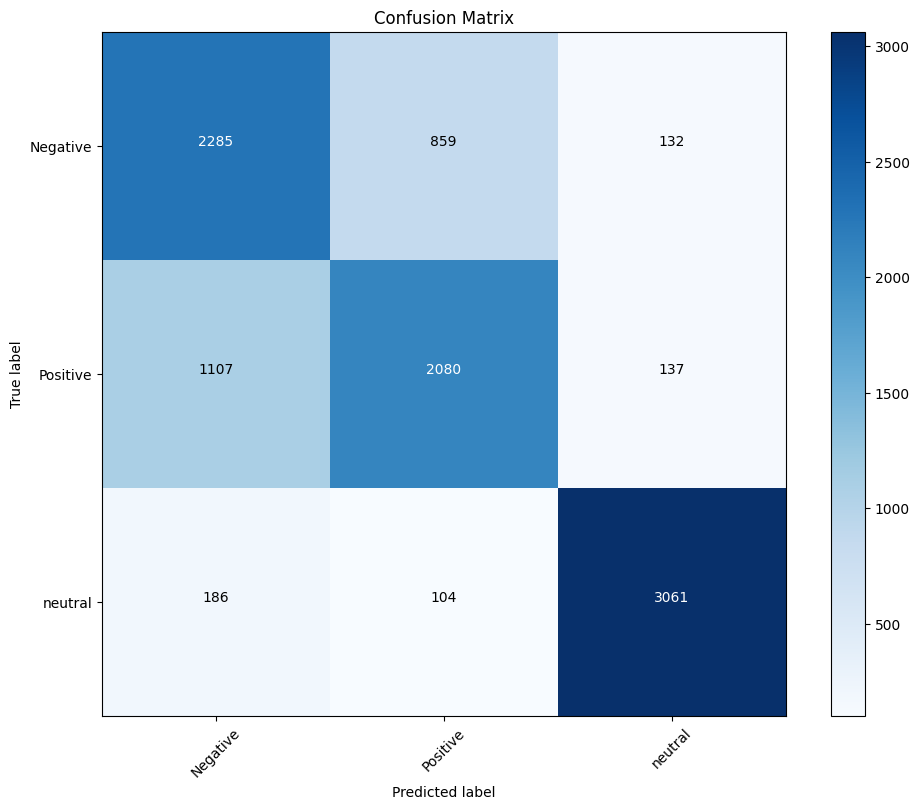

In [ ]:
model, results, history = train_with_dataframes(
    train_df=train_df,
    val_df=val_df,
    test_df=test_df,
    text_column='text',
    sentiment_column='sentiment'
)

##Hybrid BERT-LSTM Model
full data

In [ ]:
!pip install tensorflow==2.12.0
!pip install keras==2.12.0
!pip install transformers==4.30.2

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 87.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 123.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.3
    Uninstalling transformers-4.52.3:
      Successfully uninstalled transformers-4.52.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.30.2 which is incompatible.


In [ ]:
"""
Hybrid BERT-LSTM Model for Tweet Sentiment Classification
- Uses minimal preprocessing for optimal BERT performance
- Compatible with TensorFlow 2.12.0 and Transformers 4.30.2
- Designed for Google Colab environment
"""
# Install required packages (uncomment if needed)
# !pip install transformers==4.30.2
# !pip install tensorflow==2.12.0

# Import transformers (after installation)
from transformers import BertTokenizer, TFBertModel, BertConfig

# Check for GPU
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Minimal preprocessing for BERT - this is the key improvement
def preprocess_for_bert(text):
    """
    Minimal preprocessing for BERT models - preserves semantic structure
    which is critical for BERT's contextual embeddings
    """
    if pd.isna(text) or not isinstance(text, str):
        return ""

    # Convert to lowercase (optional but can help with consistency)
    text = text.lower()

    # Remove URLs (these add noise and have no semantic value)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text).strip()

    # Keep punctuation, emojis, and special characters (BERT can learn from these)

    return text

# F1 score metric
def f1_score_metric(average='macro'):
    """
    F1 score metric that works better with class imbalance
    """
    def f1(y_true, y_pred):
        # Get predicted class
        y_pred_classes = tf.argmax(y_pred, axis=1)
        # Convert one-hot back to class indices if needed
        if len(tf.shape(y_true)) > 1 and tf.shape(y_true)[1] > 1:
            y_true_classes = tf.argmax(y_true, axis=1)
        else:
            y_true_classes = tf.cast(y_true, tf.int64)

        # Calculate precision and recall for each class
        true_positives = tf.cast(tf.math.confusion_matrix(y_true_classes, y_pred_classes, num_classes=3), tf.float32)
        row_sums = tf.reduce_sum(true_positives, axis=1)
        col_sums = tf.reduce_sum(true_positives, axis=0)
        diag = tf.linalg.diag_part(true_positives)

        # Handle division by zero
        precision = diag / (col_sums + tf.constant(1e-7))
        recall = diag / (row_sums + tf.constant(1e-7))

        # Calculate F1 score
        f1_scores = 2 * precision * recall / (precision + recall + tf.constant(1e-7))

        # Return macro or weighted average
        if average == 'macro':
            return tf.reduce_mean(f1_scores)
        else:  # weighted
            weights = row_sums / tf.reduce_sum(row_sums)
            return tf.reduce_sum(f1_scores * weights)

    return f1

# Create hybrid BERT-LSTM model
def create_hybrid_bert_lstm(max_length=128, lstm_units=64, dropout_rate=0.2):
    """
    Creates a hybrid BERT-LSTM model with:
    - BERT base for contextual embeddings
    - Bidirectional LSTM for sequence modeling
    - Dense layers with dropout for classification
    """
    # Input layers
    input_ids = Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

    # BERT layer with gradient checkpointing for memory efficiency
    bert_config = BertConfig.from_pretrained('bert-base-uncased')
    bert_config.gradient_checkpointing = True
    bert_model = TFBertModel.from_pretrained('bert-base-uncased', config=bert_config)

    # Freeze the first 8 layers of BERT (fine-tune only the top layers)
    for layer in bert_model.layers[:8]:
        layer.trainable = False

    # Get BERT embeddings
    bert_outputs = bert_model(input_ids, attention_mask=attention_mask)
    sequence_output = bert_outputs.last_hidden_state

    # Bidirectional LSTM layers
    lstm_1 = Bidirectional(LSTM(lstm_units, return_sequences=True, dropout=dropout_rate, recurrent_dropout=0))(sequence_output)
    lstm_2 = Bidirectional(LSTM(lstm_units // 2))(lstm_1)

    # Output layers with regularization
    x = Dense(128, activation='relu')(lstm_2)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(3, activation='softmax')(x)

    # Create model
    model = Model(inputs=[input_ids, attention_mask], outputs=outputs)

    return model

# Create callbacks
def create_callbacks(model_path="best_model.weights.h5"):
    callbacks = [
        # Save best model
        ModelCheckpoint(
            filepath=model_path,
            monitor='val_f1_score_metric',
            mode='max',
            save_best_only=True,
            save_weights_only=True,
            verbose=1
        ),
        # Early stopping
        EarlyStopping(
            monitor='val_f1_score_metric',
            patience=3,
            mode='max',
            restore_best_weights=True,
            verbose=1
        ),
        # Reduce learning rate
        ReduceLROnPlateau(
            monitor='val_f1_score_metric',
            factor=0.5,
            patience=2,
            mode='max',
            min_lr=1e-6,
            verbose=1
        )
    ]
    return callbacks

# Main function to run the model
def main():
    # Load your data
    # Replace with your actual data loading code
    # Example:
    # df = pd.read_csv('your_dataset.csv')

    # For demonstration, we'll assume the dataframe is already loaded as df
    # with 'text' and 'sentiment' columns

    print("Preprocessing data...")
    # Apply minimal preprocessing
    all_data_df_shuffled['processed_text'] = all_data_df_shuffled['text'].apply(preprocess_for_bert)

    # Create sentiment mapping
    sentiment_mapping = {
        'Negative': -1,
        'neutral': 0,
        'Positive': 1
    }

    # Apply mapping
    all_data_df_shuffled['sentiment_numeric'] = all_data_df_shuffled['sentiment'].map(sentiment_mapping)

    # Split data into train, validation, and test sets
    train_df, temp_df = train_test_split(all_data_df_shuffled, test_size=0.3, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.333, random_state=42)

    print(f"Training set size: {len(train_df)}")
    print(f"Validation set size: {len(val_df)}")
    print(f"Testing set size: {len(test_df)}")

    # Tokenize data for BERT
    print("Tokenizing data...")
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    max_length = 128

    # Function to encode data
    def encode_examples(texts, labels, max_length=128):
        # Tokenize inputs
        inputs = tokenizer(
            texts,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_tensors='np'
        )

        # Convert labels to one-hot encoding (add 1 to shift from -1,0,1 to 0,1,2)
        labels_array = np.array(labels) + 1
        one_hot_labels = tf.keras.utils.to_categorical(labels_array, num_classes=3)

        return inputs, one_hot_labels

    # Encode datasets
    train_inputs, train_labels = encode_examples(train_df['processed_text'].tolist(), train_df['sentiment_numeric'].tolist(), max_length)
    val_inputs, val_labels = encode_examples(val_df['processed_text'].tolist(), val_df['sentiment_numeric'].tolist(), max_length)
    test_inputs, test_labels = encode_examples(test_df['processed_text'].tolist(), test_df['sentiment_numeric'].tolist(), max_length)

    # Create and compile model
    print("Creating model...")
    model = create_hybrid_bert_lstm(max_length)

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=2e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy', f1_score_metric()]
    )

    # Print model summary
    model.summary()

    # Train model
    print("Training model...")
    batch_size = 16  # Adjust based on your GPU memory

    history = model.fit(
        [train_inputs['input_ids'], train_inputs['attention_mask']],
        train_labels,
        validation_data=([val_inputs['input_ids'], val_inputs['attention_mask']], val_labels),
        epochs=5,  # Increase for better results
        batch_size=batch_size,
        callbacks=create_callbacks()
    )

    # Evaluate model
    print("Evaluating model...")
    test_results = model.evaluate(
        [test_inputs['input_ids'], test_inputs['attention_mask']],
        test_labels
    )
    print(f"Test loss: {test_results[0]:.4f}")
    print(f"Test accuracy: {test_results[1]:.4f}")
    print(f"Test F1 score: {test_results[2]:.4f}")

    # Generate predictions
    y_pred_probs = model.predict([test_inputs['input_ids'], test_inputs['attention_mask']])
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(test_labels, axis=1)

    # Convert back to original labels (-1, 0, 1)
    y_pred_original = y_pred - 1
    y_true_original = y_true - 1

    # Create confusion matrix
    cm = confusion_matrix(y_true_original, y_pred_original)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(
        y_true_original,
        y_pred_original,
        target_names=['Negative', 'Neutral', 'Positive']
    ))

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['f1_score_metric'])
    plt.plot(history.history['val_f1_score_metric'])
    plt.title('Model F1 Score')
    plt.ylabel('F1 Score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.show()

    print("Model training and evaluation complete.")
    return model, history

# Run the main function when the script is executed
if __name__ == "__main__":
    main()


GPU Available:  []
Preprocessing data...
Training set size: 69982
Validation set size: 20005
Testing set size: 9988
Tokenizing data...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Creating model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           